In [252]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


In [253]:
G = nx.DiGraph()

# VERDES
G.add_node(245, demand = 5, color='blue', bipartite=1)
G.add_node(299, demand = -5, color='red', bipartite=0)
G.add_edge(245, 299, weight= 0, capacity = 25, color='green' )

G.add_node(260, demand = 5, color='blue', bipartite=1)
G.add_node(314, demand = -5, color='red', bipartite=0)
G.add_edge(260, 314, weight= 0, capacity = 25, color='green' )

G.add_node(289, demand = 5, color='blue', bipartite=0)
G.add_node(343, demand = -5, color='red', bipartite=1)
G.add_edge(289, 343, weight= 0, capacity = 25, color='green' )

G.add_node(304, demand = 5, color='blue', bipartite=0)
G.add_node(358, demand = -5, color='red', bipartite=1)
G.add_edge(304, 358, weight= 0, capacity = 25, color='green' )

# ROJO
G.add_edge(358, 245, weight= 1, capacity = 20, color='red' )
G.add_edge(314, 289, weight= 1, capacity = 20, color='red' )

# AZUL
G.add_edge(245, 260, weight= 0, capacity = 25, color='blue' )
G.add_edge(260, 343, weight= 0, capacity = 25, color='blue' )
G.add_edge(343, 358, weight= 0, capacity = 25, color='blue' )

G.add_edge(289, 299, weight= 0, capacity = 25, color='blue' )
G.add_edge(299, 304, weight= 0, capacity = 25, color='blue' )
G.add_edge(304, 314, weight= 0, capacity = 25, color='blue' )


# Calcular el flujo de costo mínimo
flow_dict = nx.min_cost_flow(G)
print(flow_dict)

{245: {299: 0, 260: 5}, 299: {304: 5}, 260: {314: 0, 343: 0}, 314: {289: 5}, 289: {343: 0, 299: 0}, 343: {358: 5}, 304: {358: 0, 314: 0}, 358: {245: 10}}


{314: (0, 0), 304: (0, 1), 299: (0, 2), 289: (0, 3), 358: (1, 0), 343: (1, 1), 260: (1, 2), 245: (1, 3)}


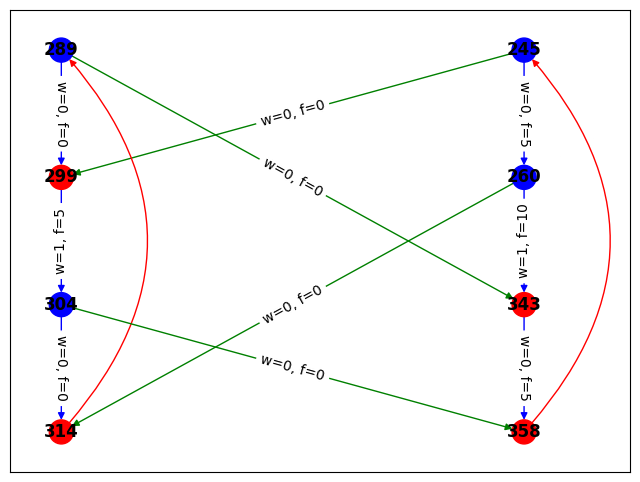

{245: {299: 0, 260: 5}, 299: {304: 5}, 260: {314: 0, 343: 0}, 314: {289: 5}, 289: {343: 0, 299: 0}, 343: {358: 5}, 304: {358: 0, 314: 0}, 358: {245: 10}}


In [254]:
# Crear etiquetas para los bordes que muestren peso y flujo
edge_labels = {(u, v): f"w={d['weight']}, f={flow_dict[u][v]}" 
               for u, v, d in G.edges(data=True)}

# Asignar colores a los nodos y bordes
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
edge_colors = [G[u][v]['color'] for u, v in G.edges()]

# Definir la disposición manualmente para un layout bipartito ordenado
pos = {}
izq = [314, 304, 299, 289]
der = [358, 343, 260, 245]

# Asignar posiciones en el eje x (columna 0 para izq y columna 1 para der)
for i, node in enumerate(izq):
    pos[node] = (0, i)
for i, node in enumerate(der):
    pos[node] = (1, i)

print(pos)
# Definir qué aristas deben tener curva
edges_with_curves = [(314, 289), (358, 245)]  # Especificar aristas con curva aquí
edge_styles = ['arc3, rad=0.45' if (u, v) in edges_with_curves else 'arc3, rad=0' for u, v in G.edges()]

# Dibujar nodos
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_color=node_colors)

# Dibujar etiquetas de los nodos
nx.draw_networkx_labels(G, pos, font_weight='bold')

# Dibujar bordes con y sin curva
for (u, v), style in zip(G.edges(), edge_styles):
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color=[G[u][v]['color']], connectionstyle=style)

# Dibujar etiquetas de los bordes
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()
print(flow_dict)

In [255]:
flow_dict = nx.min_cost_flow(G)
flow_dict

{245: {299: 0, 260: 5},
 299: {304: 5},
 260: {314: 0, 343: 0},
 314: {289: 5},
 289: {343: 0, 299: 0},
 343: {358: 5},
 304: {358: 0, 314: 0},
 358: {245: 10}}

In [256]:
G[289].values()


ValuesView(AtlasView({343: {'weight': 0, 'capacity': 25, 'color': 'green'}, 299: {'weight': 0, 'capacity': 25, 'color': 'blue'}}))

In [257]:
def get_node_name(time:int,station:str):
    name = str(time)
    while len(name) < 4:
        name = '0' + name
    return name +"_" +station[:2]

get_node_name(342,"Retiro")

'0342_Re'

In [258]:
def sort_nodes(nodes:list):
    sorted_nodes = []
    print("ASD",nodes)
    for i in range(len(nodes)):
        print(nodes[i])
        value = int(nodes[i][:4])
        sorted_nodes.append(value)
    sorted_nodes.sort()
    for i in range(len(sorted_nodes)):
        sorted_nodes[i] = get_node_name(sorted_nodes[i],nodes[i][5:])
    return sorted_nodes

In [259]:
import json
def getPos(filename:str):

	data = None
	
	with open(filename) as json_file:
		data = json.load(json_file)
		json_file.close()
	
	servicios:dict = data["services"]
	pos = {}
	for i, estacion in enumerate(data["stations"]):
		columna = []
		for key, value in servicios.items():
			
			if value["stops"][0]["station"] == estacion:
					name_value = get_node_name(value["stops"][0]["time"],value["stops"][0]["station"])
					columna.append(name_value)
			if value["stops"][1]["station"] == estacion:
					name_value = get_node_name(value["stops"][1]["time"],value["stops"][1]["station"])
					columna.append(name_value)
		columna = sort_nodes(columna)
		
		for j, value in enumerate(columna):
			pos[value] = (i,j)
	print(pos)
			
	 	 		
	 
getPos(flow_dict, "../instances/toy_instance.json", G)
	
    

TypeError: getPos() takes 1 positional argument but 3 were given

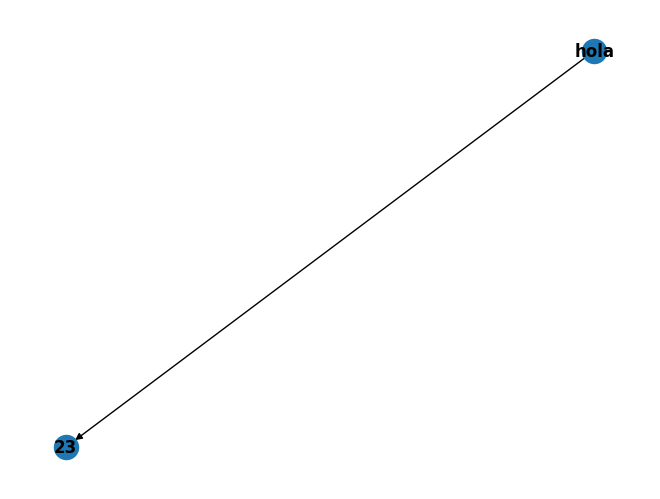

In [ ]:
G2 = nx.DiGraph()
G2.add_node("hola", demand = 5, color='blue', bipartite=1)
G2.add_node(23, demand = -5, color='red', bipartite=0)

G2.add_edge("hola", 23, weight= 0, capacity = 25, color='green' )

# simple graph
nx.draw(G2, with_labels=True, font_weight='bold')
plt.show()

In [261]:
def printGraph(G,filename,flow_dict):
	# Crear etiquetas para los bordes que muestren peso, capacidad y flujo
	edge_labels = {(u, v): f"w={d['weight']}, c={d['capacity']}, f={flow_dict[u][v]}"
				for u, v, d in G.edges(data=True)}
	# Asignar colores a los nodos y bordes
	node_colors = [G.nodes[node]['color'] for node in G.nodes()]
	edge_colors = [G[u][v]['color'] for u, v in G.edges()]
	
	edges_with_curves = [("0314_Re", "0289_Re"), ("0358_Ti", "0245_Ti")]  # Especificar aristas con curva aquí
	edge_styles = ['arc3, rad=0.45' if (u, v) in edges_with_curves else 'arc3, rad=0' for u, v in G.edges()]


	pos = getPos(filename)
	
	plt.figure(figsize=(8, 6))
	nx.draw_networkx_nodes(G, pos, node_color=node_colors)
	nx.draw_networkx_labels(G, pos, font_weight='bold')
	nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
	for (u, v), style in zip(G.edges(), edge_styles):
	    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color=[G[u][v]['color']], connectionstyle=style)
	plt.show()

In [263]:
import json
import random

def generate_random_json(num_services=20, num_stations=2, num_stops_per_service=2, max_time=1000, demand_value=500, capacity=100, max_rs=25,seed = 40,time_beetween_services = 58):
    random.seed(seed)
    stations = [f"Station_{i}" for i in range(num_stations)]
    services = {}
    
    for service_id in range(1, num_services + 1):
        stops = []
        time = random.randint(0, max_time)
        stop = {
            "time": time,
            "station": random.choice(stations),
            "type": "D"
        }
        stops.append(stop)
        stop = {
            "time": time + time_beetween_services,
            "station": random.choice(stations),
            "type": "A"
        }
        stops.append(stop)
        services[str(service_id)] = {
            "stops": stops,
            "demand": [np.random.randint(0.5 * demand_value, demand_value)]
        }
    
    cost_per_unit = {station: round(random.uniform(0.5, 2.0), 2) for station in stations}

    data = {
        "services": services,
        "stations": stations,
        "cost_per_unit": cost_per_unit,
        "rs_info": {
            "capacity": capacity,
            "max_rs": max_rs
        }
    }
    
    return json.dumps(data, indent=4)

# Generar un JSON con la función
random_json = generate_random_json(num_services=5, num_stations=2, num_stops_per_service=2)
print(random_json)


{
    "services": {
        "1": {
            "stops": [
                {
                    "time": 469,
                    "station": "Station_0",
                    "type": "A"
                },
                {
                    "time": 289,
                    "station": "Station_0",
                    "type": "A"
                }
            ],
            "demand": [
                409
            ]
        },
        "2": {
            "stops": [
                {
                    "time": 780,
                    "station": "Station_1",
                    "type": "D"
                },
                {
                    "time": 900,
                    "station": "Station_1",
                    "type": "A"
                }
            ],
            "demand": [
                253
            ]
        },
        "3": {
            "stops": [
                {
                    "time": 540,
                    "station": "Station_0",
                    "